In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_tokenizer import get_tokenizer

## Strings Length statistics

In [4]:
tokenizer_path = '/nfs/c9/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/data/tokenizers/tokenizer_sf/tokenizer.json'
tokenizer = get_tokenizer(tokenizer_path)

In [10]:
def calc_length(subset_name):
    subset_path = f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/{subset_name}/probs.csv'
    df = pd.read_csv(subset_path)
    valid_mols = df['Name'].unique()

    lengths = []
    for mol in valid_mols:
        encoded_sample = tokenizer.tokenize(mol) 
        length = len(encoded_sample)
        lengths.append(length)
        
    return lengths

In [13]:
aspirin_length = calc_length('aspirin')
sas_length = calc_length('sas')
druglike_length = calc_length('druglike')
eqdist_length = calc_length('eqdist')

In [14]:
def plot_len_dist(subset_length, subset_name):
    min_value = min(subset_length)
    max_value = max(subset_length)
    mean_value = sum(subset_length) / len(subset_length)
    
    hist_color = 'lightblue'
    min_color = 'gold'
    mean_color = 'orange'
    max_color = 'firebrick'

    plt.figure(figsize=(10, 6))
    plt.hist(subset_length, bins=10, color=hist_color, edgecolor='black')
    
    plt.axvline(min_value, color=min_color, linestyle='--', linewidth=2, label=f'Min: {min_value}')
    plt.axvline(mean_value, color=mean_color, linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(max_value, color=max_color, linestyle='--', linewidth=2, label=f'Max: {max_value}')
    
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {subset_name} molecules Lengths', pad=20)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    
    plt.annotate(f'Min: {min_value}', xy=(min_value, 3500), xytext=(min_value, 3830),
                 arrowprops=dict(facecolor=min_color, shrink=0.05))
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, 3500), xytext=(mean_value, 3830),
                 arrowprops=dict(facecolor=mean_color, shrink=0.05))
    plt.annotate(f'Max: {max_value}', xy=(max_value, 3500), xytext=(max_value, 3830),
                arrowprops=dict(facecolor=max_color, shrink=0.05))
    
    plt.show()

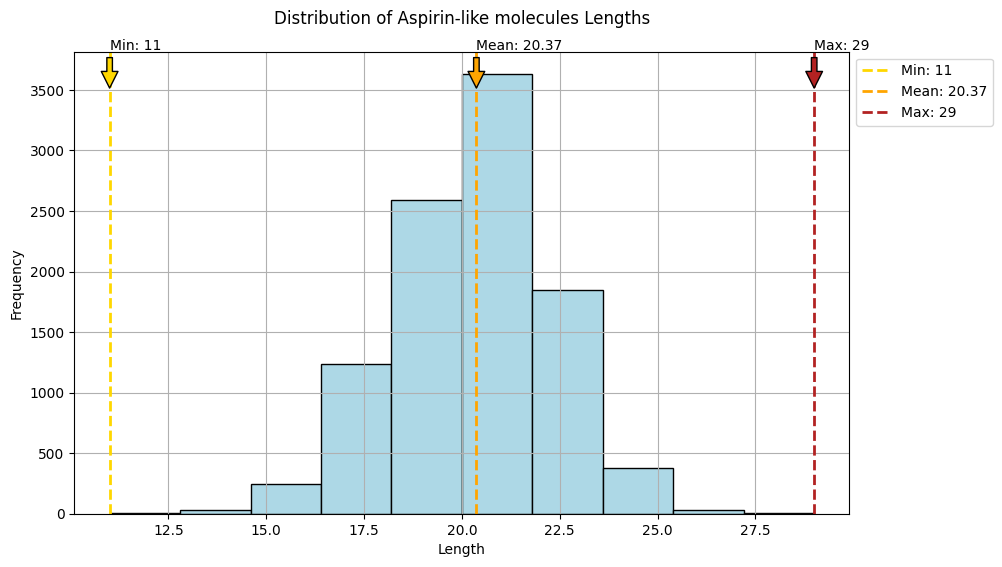

In [15]:
plot_len_dist(aspirin_length, 'Aspirin-like')

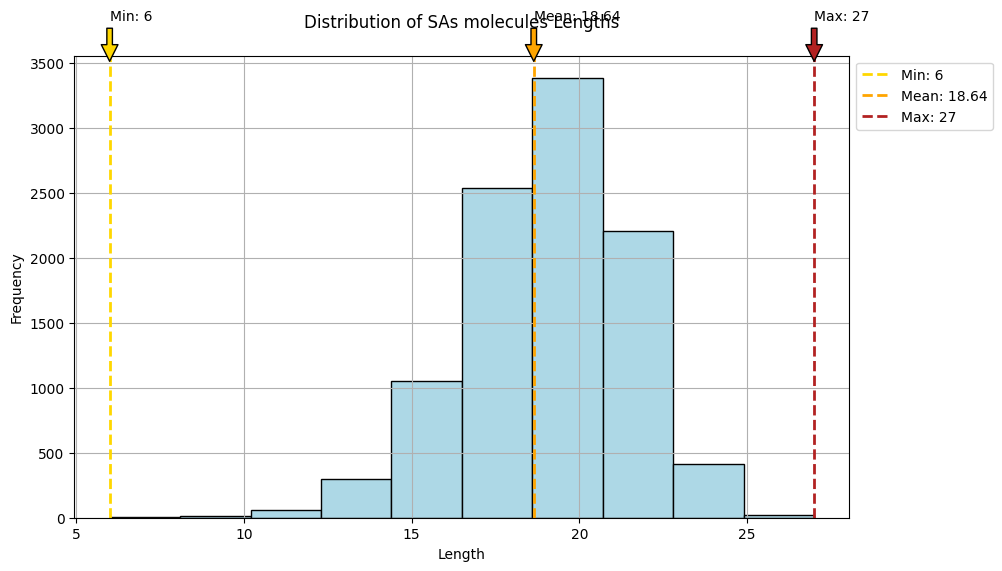

In [16]:
plot_len_dist(sas_length,'SAs')

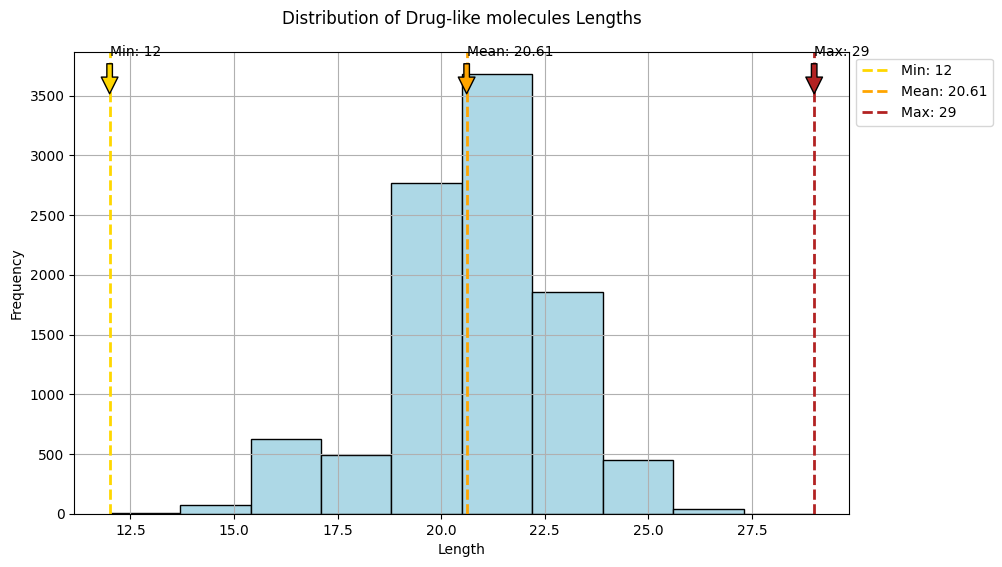

In [17]:
plot_len_dist(druglike_length,'Drug-like')

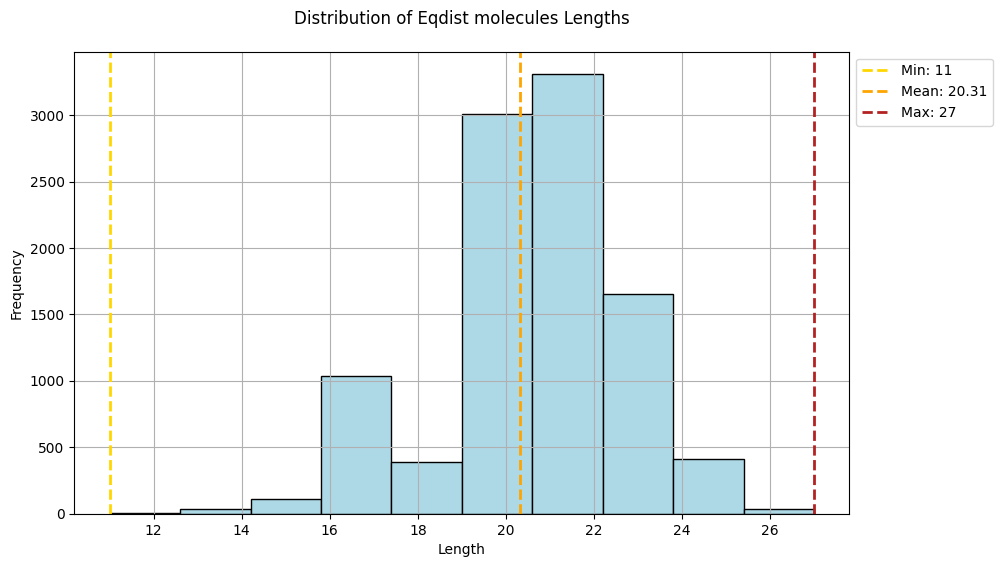

In [18]:
plot_len_dist(eqdist_length,'Eqdist')

## Randomized SELFIES count in large validation sets

In [32]:
def rand_sf_count(subset_name):
    df = pd.read_csv(f'/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/ablations/validations/selfies/valid_canon_canon/{subset_name}/probs.csv')
    length = df.shape[0]
    df['Count'] = np.ones(length)
    count = (df.groupby('Name')['Count'].sum()).to_list()

    return count

In [33]:
aspirin_rand_sf_count = rand_sf_count('aspirin')
sas_rand_sf_count = rand_sf_count('sas')
druglike_rand_sf_count = rand_sf_count('druglike')
eqdist_rand_sf_count = rand_sf_count('eqdist')

## Validation SELFIES Length vs Randomized SELFIES Count

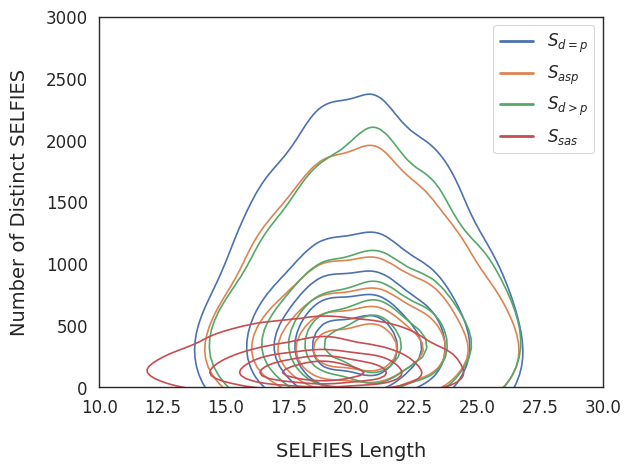

In [29]:
sns.set_context('paper')
sns.set_theme('paper','white')

l = 6
bw = 2
a = 0.7

plot1 = sns.kdeplot(x=eqdist_length, y=eqdist_rand_sf_count, levels=l, bw_adjust=bw, label='S_{d=p}')
plot2 = sns.kdeplot(x=aspirin_length, y=aspirin_rand_sf_count, levels=l, bw_adjust=bw, label='S_{asp}')
plot3 = sns.kdeplot(x=druglike_length, y=druglike_rand_sf_count, levels=l, bw_adjust=bw, label='S_{d>p}')
plot4 = sns.kdeplot(x=sas_length, y=sas_rand_sf_count, levels=l, bw_adjust=bw, label='S_{sas}')

plt.ylim(0, 3000)
plt.xlim(10, 30)

# Manually setting the legend
handles = [
    plt.Line2D([0], [0], color=plot1.collections[0].get_edgecolor()[0], lw=2),
    plt.Line2D([0], [0], color=plot2.collections[1].get_edgecolor()[0], lw=2),
    plt.Line2D([0], [0], color=plot3.collections[2].get_edgecolor()[0], lw=2),
    plt.Line2D([0], [0], color=plot4.collections[3].get_edgecolor()[0], lw=2)
]
labels = ['$S_{d=p}$', '$S_{asp}$', '$S_{d>p}$', '$S_{sas}$']

plt.xlabel('SELFIES Length', fontsize=14, labelpad=18)
plt.ylabel('Number of Distinct SELFIES', fontsize=14, labelpad=12)
plt.legend(handles, labels, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('/mnt/2tb/chem/hasmik/GDB_Generation_hf_project/Molecular_Generation_with_GDB13/src/plots/Length_vs_Versions.pdf')